In [124]:
get_ipython().system('pip install spacy')

In [125]:
get_ipython().system('pip install wordcloud')

In [126]:
import numpy as np
import pandas as pd
import nltk
import os
import nltk.corpus
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split


In [127]:
musk=pd.read_csv("Elon_musk.csv", sep=',', encoding='latin-1')
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [128]:
train,test = train_test_split(musk,test_size=0.1)

In [129]:
train

,Unnamed: 0,Text
899,900,@WholeMarsBlog <U+0001F4AB> <U+0001F6F0>
824,825,@FutureJurvetson @PPathole Super appreciate yo...
45,46,So its finally come to this https://t.co/...
1136,1137,@Zshauladventure @NASAKennedy @ulalaunch @Spac...
1317,1318,Many exciting things will be unveiled on Batte...
...,...,...
1621,1622,RT @Erdayastronaut: Spot the tiny humans!!! Th...
639,640,@Astronomiaum Life in glass domes at first. Ev...
1125,1126,@PPathole @thesheetztweetz @waEMD @SpaceX @Spa...
554,555,@ID_AA_Carmack Int8 for almost all heavy lifti...


In [130]:
test

,Unnamed: 0,Text
771,772,RT @Commercial_Crew: The Flight Readiness Revi...
1561,1562,https://t.co/mDoPO17YB9 https://t.co/326rkUEYW8
1597,1598,@Teslarati This is important
1241,1242,@teslaownersSV @jgrano305 @soumiksf @ID_AA_Car...
276,277,@CodingMark @flcnhvy It is
...,...,...
1548,1549,@WholeMarsBlog <U+0001F923><U+0001F923>
921,922,@StephenKing Agreed. Are these performance tires?
556,557,@thisisjendoll https://t.co/mMg5b8b40z
735,736,Case closed https://t.co/pUYiJcAdD6


In [131]:
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [132]:
# Clean The Text
musk["Text"] = musk["Text"].apply(cleantext)

musk.head()

,Unnamed: 0,Text
0,1,Im an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [133]:
from textwrap import TextWrapper

In [134]:
pip install textblob

In [135]:
from textblob import TextBlob

In [136]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [137]:
# Adding Subjectivity & Polarity
musk[["subjectivity", "polarity"]] = musk.apply(sentiment_analysis, axis=1)
musk

,Unnamed: 0,Text,subjectivity,polarity
0,1,Im an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


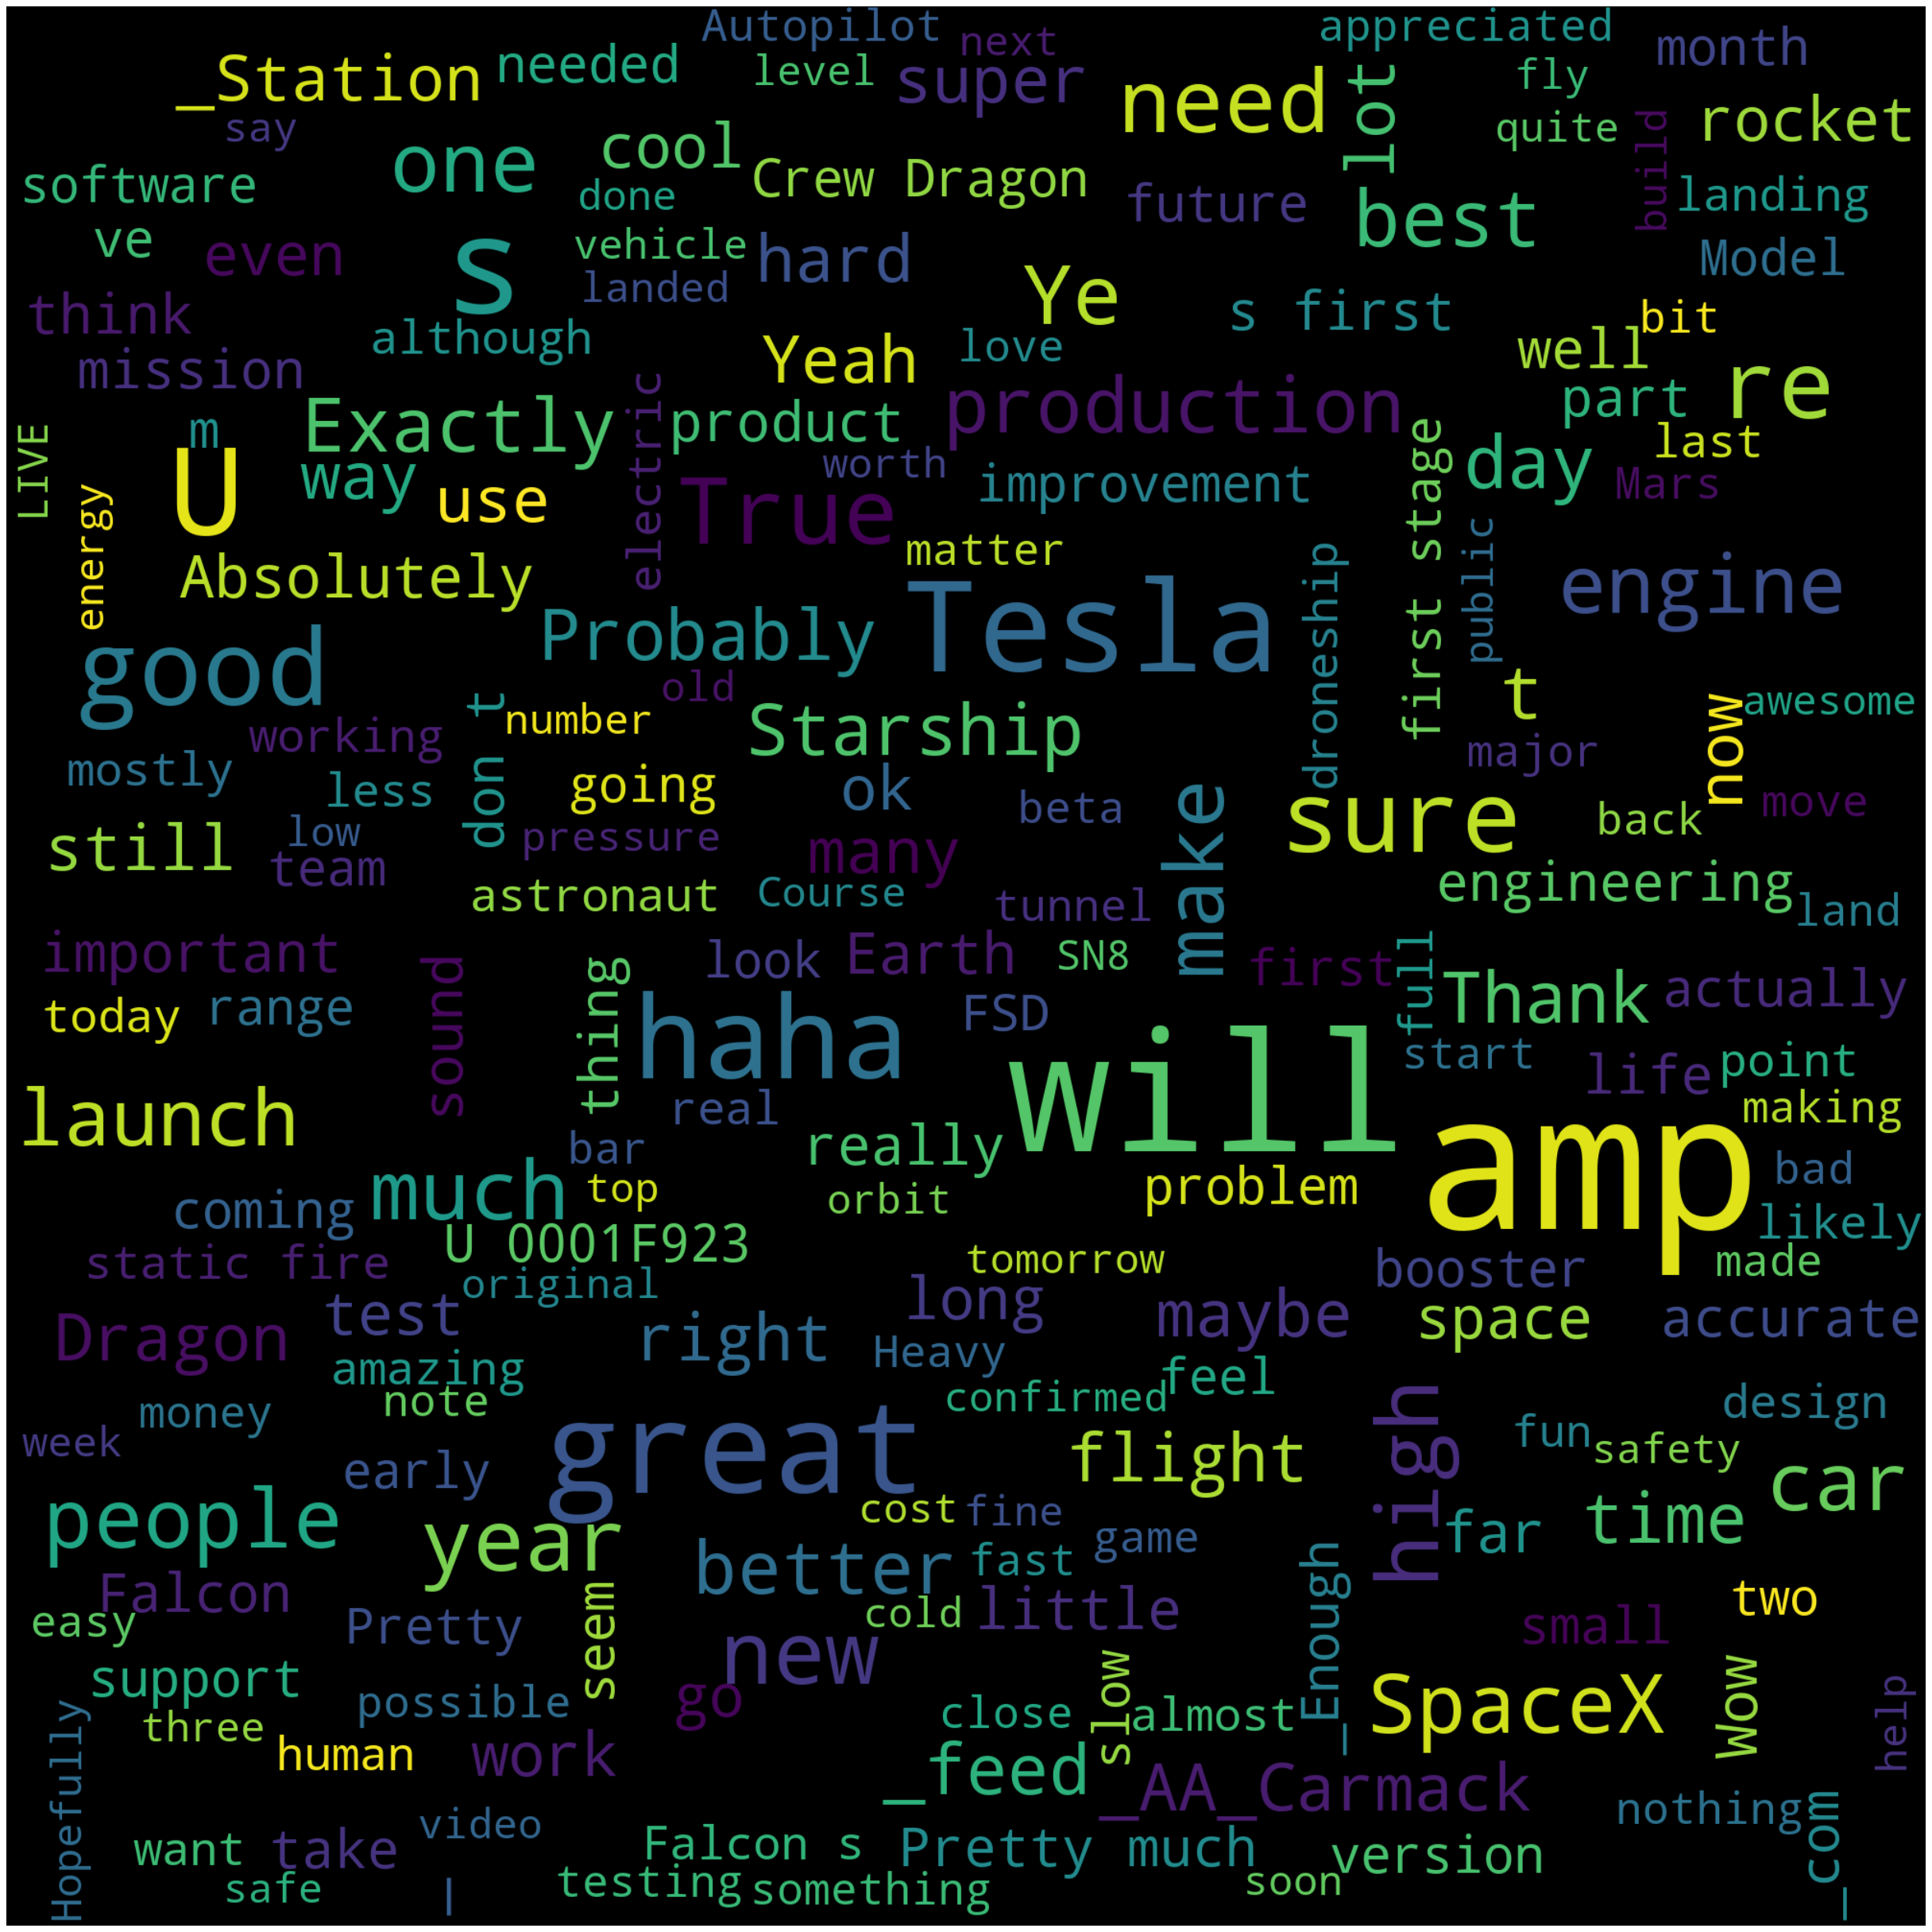

In [157]:
allwords = " ".join([twts for twts in musk["Text"]])
wordCloud = WordCloud(width = 2000, height = 2000, random_state = 100, max_font_size = 200).generate(allwords)
plt.figure(figsize=(40, 40), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [139]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [140]:
# Create a New Analysis Column
musk["analysis"] = musk["polarity"].apply(analysis)

In [141]:
musk

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,Im an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [142]:
positive_tweets = musk[musk['analysis'] == 'Positive']
negative_tweets = musk[musk['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:10].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:10].iterrows():
  print(' -' + row['Text'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
 -  Its getting real
 - He definitely has issues, but the sentencing seems a bit high
 - Thanks for fixing
 -This is true power haha 
 -: NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission! 
negative tweets
 - Im an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.
 - Doge appears to be inflationary, but is not meaningfully so (fixed  of coins per unit time), whereas 
 -  It was foolish of us not to

In [143]:
musk = musk[['Text','analysis']]
musk

,Text,analysis
0,Im an alien,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,Neutral
2,Great interview!,Positive
3,Doge is underestimated,Neutral
4,Congratulations Tesla China for amazing execu...,Positive
...,...,...
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive
1996,Samwise Gamgee,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,Negative


In [144]:
musk = musk [musk ['analysis']!= 'Neutral']
musk

,Text,analysis
0,Im an alien,Negative
2,Great interview!,Positive
4,Congratulations Tesla China for amazing execu...,Positive
5,Happy New Year of the Ox!,Positive
7,_ Haha thanks :),Positive
...,...,...
1989,"Sorry, should hopefully be soon!",Negative
1991,"No easy way to answer this in a tweet, but he...",Positive
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive


In [120]:
musk.shape

(1999, 2)

In [121]:
musk.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [49]:
musk.info

<bound method DataFrame.info of                                                    Text  analysis
0                                          Im an alien  Negative
2                                      Great interview!  Positive
4      Congratulations Tesla China for amazing execu...  Positive
5                            Happy New Year of the Ox!   Positive
7                                    _   Haha thanks :)  Positive
...                                                 ...       ...
1989                   Sorry, should hopefully be soon!  Negative
1991   No easy way to answer this in a tweet, but he...  Positive
1994   True, it sounds so surreal, but the negative ...  Positive
1995   Make sure to read ur terms &amp; conditions b...  Positive
1997   Altho Dumb and Dumber is <U+0001F525><U+0001F...  Negative

[1103 rows x 2 columns]>

In [52]:
# data preprocessing
train,test = train_test_split(musk,test_size=0.1)

In [54]:
train

,Text,analysis
1777,Great song\n,Positive
1074,We do expect to make heavy use of LFP for med...,Negative
752,"Technically, I tested positive, then negative...",Positive
216,Absolutely! They rock. <U+0001F5A4>,Positive
282,Already donated to Signal a year ago. Will d...,Positive
...,...,...
1259,Irrational is such a funny word to describe n...,Positive
312,Playing the long game,Negative
895,"To the best of my knowledge, literally zero ...",Positive
973,For sure,Positive


In [56]:
test

,Text,analysis
1464,"400 Wh/kg *with* high cycle life, produced in...",Positive
876,For a long time,Negative
228,This is a good one,Positive
155,_Ryan A little,Negative
1663,_feed Pretty much,Positive
...,...,...
950,"Wow, that would be quite a trip!",Positive
1687,: Crew Dragon will depart the _Station with a...,Negative
887,Max Payne was great on many levels. Silent H...,Positive
1305,SN8 Starship with flaps &amp; nosecone should ...,Positive


In [57]:
for val in train['Text']:
    print (val)

Great song

 We do expect to make heavy use of LFP for medium range cars &amp; stationary storage
 Technically, I tested positive, then negative twice, then positive again, so Elon Musk Tests Negati 
  Absolutely! They rock. <U+0001F5A4>
  Already donated to Signal a year ago. Will donate more.
The gauntlet has been thrown down! 

The prophecy will be fulfilled. 

Model S price changes to $69,420 tonight!
 _feed Yes, that would be the best way to do it. A large solar field or reactor is needed for po 
So proud of the Tesla team for achieving this major milestone! At the start of Tesla, I thought we had (optimistica 
_Lockyer   If you ever want to build a long accelerator tunnel, straight or circular, I know some people 
  Some of the tests we initially tried at Tesla were ~50% false positive, including some fro 
Fuel header tank pressure was low during landing burn, causing touchdown velocity to be high &amp; RUD, but we got all 
: LIVE NOW: We are ready to LaunchAmerica. Are yo

In [58]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [59]:
pattern = "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"

In [67]:
train['Text'][216]

'  Absolutely! They rock. <U+0001F5A4>'

In [68]:
def Clean_Text(musk):
    Text = []
    analysis = []
    for index,row in musk.iterrows():
        sentence = re.sub(pattern,'',row.Text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        Text.append(words)
        analysis.append(row.analysis)
    return Text,analysis

In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [72]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [73]:
train_Text,train_analysis = Clean_Text(train)

In [74]:
final_data = {'tweets':train_Text,'sentiments':train_analysis}
final_data

{'tweets': ['great song',
  'expect make heavy use lfp medium range car &amp; stationary storage',
  'technically, tested positive, negative twice, positive again, \x93elon musk test negati',
  'absolutely! rock. <u+0001f5a4>',
  'already donated signal year ago. donate more.',
  'gauntlet thrown down! prophecy fulfilled. model price change $69,420 tonight!',
  '_feed yes, would best way it. large solar field reactor needed po',
  'proud tesla team achieving major milestone! start tesla, thought (optimistica',
  '_lockyer ever want build long accelerator tunnel, straight circular, know people',
  'test initially tried tesla ~50% false positive, including fro',
  'fuel header tank pressure low landing burn, causing touchdown velocity high &amp; rud, got',
  ': live now: ready launchamerica. you? <u+0001f680> watch coverage nasa crew-1 mission. liftoff 7:27pm et:',
  'launching many small satellite wide range customer tomorrow. excited offering low-cost access',
  'trying set good exampl

In [75]:
processed_data = pd.DataFrame(final_data)

In [77]:
processed_data

,tweets,sentiments
0,great song,Positive
1,expect make heavy use lfp medium range car &am...,Negative
2,"technically, tested positive, negative twice, ...",Positive
3,absolutely! rock. <u+0001f5a4>,Positive
4,already donated signal year ago. donate more.,Positive
...,...,...
987,irrational funny word describe number,Positive
988,playing long game,Negative
989,"best knowledge, literally zero equipment usabl...",Positive
990,sure,Positive


In [78]:
# label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processed_data['sentiments'] = labelencoder.fit_transform(processed_data['sentiments'])

In [80]:
processed_data

,tweets,sentiments
0,great song,1
1,expect make heavy use lfp medium range car &am...,0
2,"technically, tested positive, negative twice, ...",1
3,absolutely! rock. <u+0001f5a4>,1
4,already donated signal year ago. donate more.,1
...,...,...
987,irrational funny word describe number,1
988,playing long game,0
989,"best knowledge, literally zero equipment usabl...",1
990,sure,1


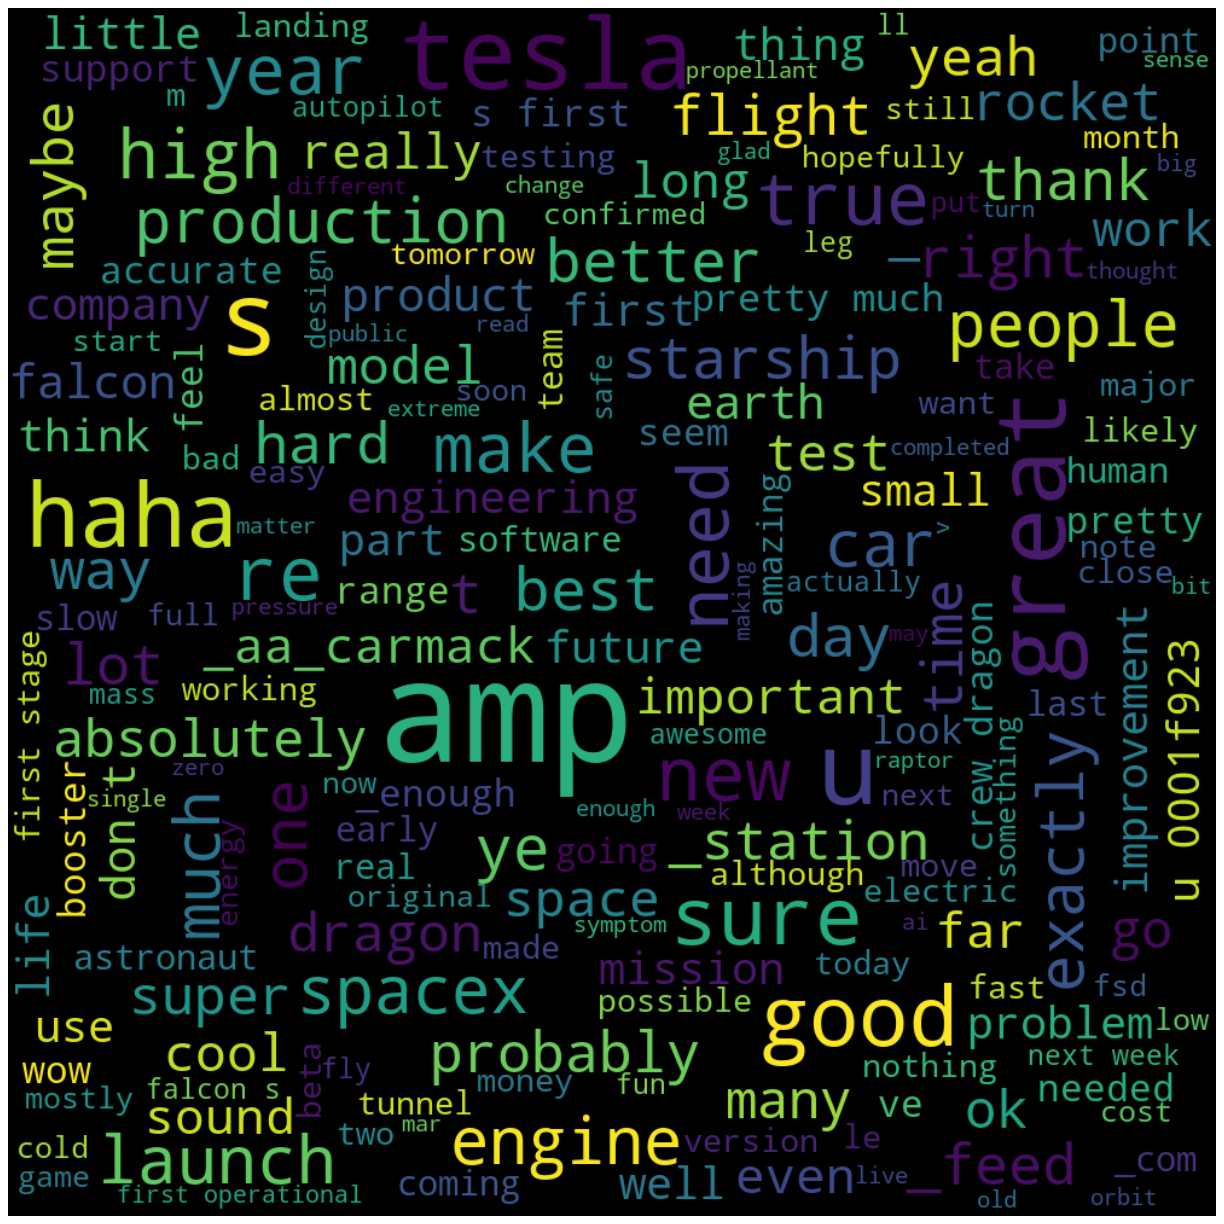

In [81]:
# visualization
allwords = " ".join([twts for twts in processed_data["tweets"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


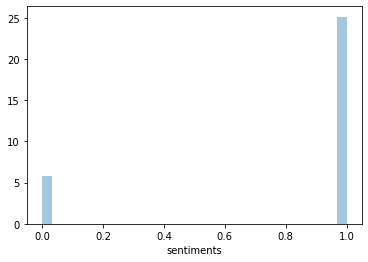

In [82]:
sns.distplot(processed_data['sentiments'])

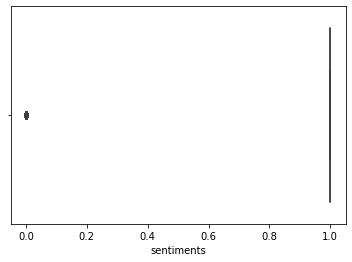

In [83]:
sns.boxplot(processed_data['sentiments'])

In [84]:
# convert words into vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
cv.fit(processed_data['tweets'])

CountVectorizer(ngram_range=(1, 3))

In [85]:
X_train = cv.transform(processed_data['tweets'])

In [86]:
print(X_train.shape)

(992, 13312)


In [88]:
X_train

<992x13312 sparse matrix of type '<class 'numpy.int64'>'
	with 17937 stored elements in Compressed Sparse Row format>

In [89]:
target = processed_data['sentiments'].values

In [91]:
target

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [92]:
# sentiment model building
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [93]:
classifier.fit(X_train,target)

MultinomialNB()

In [94]:
test_Text,test_analysis = Clean_Text(test)

In [95]:
data_test = {'tweets':test_Text,'sentiments':test_analysis}
final_test_data = pd.DataFrame(data_test)

In [96]:
final_test_data

,tweets,sentiments
0,"400 wh/kg *with* high cycle life, produced vol...",Positive
1,long time,Negative
2,good one,Positive
3,_ryan little,Negative
4,_feed pretty much,Positive
...,...,...
106,"wow, would quite trip!",Positive
107,: crew dragon depart _station _doug 6 hour spl...,Negative
108,max payne great many levels. silent hill good ...,Positive
109,sn8 starship flap &amp; nosecone done week. st...,Positive


In [97]:
X_test = cv.transform(final_test_data['tweets'])

In [99]:
X_test.shape

(111, 13312)

In [101]:
X_test.dtype

dtype('int64')

In [105]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1])

In [107]:
final_test_data['sentiments'] = labelencoder.fit_transform(final_test_data['sentiments'])

In [108]:
final_test_data

,tweets,sentiments
0,"400 wh/kg *with* high cycle life, produced vol...",1
1,long time,0
2,good one,1
3,_ryan little,0
4,_feed pretty much,1
...,...,...
106,"wow, would quite trip!",1
107,: crew dragon depart _station _doug 6 hour spl...,0
108,max payne great many levels. silent hill good ...,1
109,sn8 starship flap &amp; nosecone done week. st...,1


In [109]:
actual_values = final_test_data['sentiments'].values

In [111]:
actual_values

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, actual_values))

0.7207207207207207
